In [26]:
import numpy as np
import pandas as pd

In [27]:
train_all=pd.read_csv('train_all.csv')

In [28]:
train_lr=pd.read_csv('train_lr.csv')

In [29]:
train_dt=pd.read_csv('train_dt.csv')

In [30]:
train_all

,inst_id,OC,sido_choongchung,sido_gangwon,sido_gyeongin,sido_gyeongsang,sido_jeonra,sido_seoul,instkind_clinic,instkind_general_hospital,...,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,bedCount_class
0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.222130,0.000000,20.099863,19.781657,21.686169,20.963246,4.143135,4.174387,0.0,3.0
1,3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,18.841626,9.180719,18.812726,17.568559,18.838180,12.258481,6.687109,6.701960,0.0,4.0
2,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.459586,0.693147,0.0,4.0
3,7,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,23.557572,22.944579,23.755157,23.437961,23.284691,22.769775,6.498282,6.498282,0.0,4.0
4,9,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,24.126880,23.590810,23.784786,23.370010,15.531458,22.923325,5.332719,5.288267,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,21.685753,0.000000,22.641007,22.503290,22.405862,20.514569,5.267858,4.955827,0.0,3.0
297,423,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.382027,4.382027,0.0,3.2
298,426,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,21.498441,0.000000,22.158142,21.639056,21.904736,0.000000,3.860891,3.905642,0.0,2.6
299,427,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,22.579564,0.000000,0.000000,0.000000,0.000000,0.000000,4.615121,5.580909,0.0,3.0


In [31]:
train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inst_id                        301 non-null    int64  
 1   OC                             301 non-null    int64  
 2   sido_choongchung               301 non-null    float64
 3   sido_gangwon                   301 non-null    float64
 4   sido_gyeongin                  301 non-null    float64
 5   sido_gyeongsang                301 non-null    float64
 6   sido_jeonra                    301 non-null    float64
 7   sido_seoul                     301 non-null    float64
 8   instkind_clinic                301 non-null    float64
 9   instkind_general_hospital      301 non-null    float64
 10  instkind_hospital              301 non-null    float64
 11  instkind_nursing_hospital      301 non-null    float64
 12  instkind_traditional_clinic    301 non-null    flo

In [32]:
train_all.set_index('inst_id',inplace=True)

In [33]:
train_lr.set_index('inst_id',inplace=True)
train_dt.set_index('inst_id',inplace=True)

In [34]:
train_all['ownerChange'].value_counts()

0.000000    257
1.000000     42
0.200000      1
0.145329      1
Name: ownerChange, dtype: int64

In [35]:
train_all['ownerChange']=round(train_all['ownerChange'])
train_all['ownerChange'].value_counts()

0.0    259
1.0     42
Name: ownerChange, dtype: int64

In [36]:
train_all['bedCount_class'].value_counts()

3.000000    163
2.000000     63
1.000000     26
4.000000     25
2.800000     10
3.200000      6
2.600000      4
3.400000      2
2.200000      1
2.671533      1
Name: bedCount_class, dtype: int64

In [37]:
train_all['bedCount_class']=round(train_all['bedCount_class'])
train_all['bedCount_class'].value_counts()

3.0    186
2.0     64
1.0     26
4.0     25
Name: bedCount_class, dtype: int64

In [38]:
X=train_all.drop('OC',axis=1)
Y=train_all['OC']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X,Y, random_state=23)

In [40]:
x_train, x_valid, y_train, y_valid=train_test_split(X_train,Y_train, random_state=4)

In [41]:
y_train.value_counts()

1    161
0      7
Name: OC, dtype: int64

In [42]:
y_valid.value_counts()

1    54
0     3
Name: OC, dtype: int64

In [43]:
Y_test.value_counts()

1    71
0     5
Name: OC, dtype: int64

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [45]:
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [46]:
y_train_smote.value_counts()

1    161
0    161
Name: OC, dtype: int64

In [47]:
Y_train_smote.value_counts()

0    215
1    215
Name: OC, dtype: int64

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(x_train_smote)
test_features = scaler.transform(x_valid)

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(X_train_smote)
test_features = scaler.transform(X_test)

1. Support Vector Machine(SVM;서포트 벡터 머신)  
  
https://bioinformaticsandme.tistory.com/304

In [81]:
from sklearn import svm

clf = svm.SVC()
clf.fit(train_features, Y_train_smote)

SVC()

In [83]:
from dmba import classificationSummary
from sklearn.metrics import roc_auc_score

Y_train_pred = clf.predict(train_features)
Y_test_pred = clf.predict(test_features)

print(classificationSummary(Y_train_smote, Y_train_pred))
print(roc_auc_score(Y_train_smote, Y_train_pred))
print(classificationSummary(Y_test, Y_test_pred))
print(roc_auc_score(Y_test, Y_test_pred))

Confusion Matrix (Accuracy 0.9977)

       Prediction
Actual   0   1
     0 215   0
     1   1 214
None
0.9976744186046511
Confusion Matrix (Accuracy 0.9342)

       Prediction
Actual  0  1
     0  1  4
     1  1 70
None
0.5929577464788732


In [84]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'kernel': ['linear'], 'C':[10.,30.,100.,300.,1000.,3000.,10000.,30000.0]},
    {'kernel': ['rbf'], 'C':[1.0,3.0,10.,30.,100.,300.,1000.0],
    'gamma':[0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
]

svm_clf=svm.SVC()

grid_search=GridSearchCV(svm_clf, param_grid, cv=5, refit=True, scoring='accuracy', verbose=2)
grid_search.fit(train_features, Y_train_smote)

grid_pf=grid_search.best_estimator_.predict

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END .............................C=100.0, kernel=linear; total time=   0.0s
[CV] END .............................C=100.0, 

[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   0.0s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   0.0s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   0.0s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   0.0s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END .....................C=300.0, gamma=3.0, kernel=rbf; total time=   0.0s
[CV] END .....................C=300.0, gamma=3.0, kernel=rbf; total time=   0.0s
[CV] END .....................C=300.0, gamma=3.0, kernel=rbf; total time=   0.0s
[CV] END .....................C=300.0, gamma=3.0, kernel=rbf; total time=   0.0s
[CV] END .....................C=300.0, gamma=3.0, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

In [85]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1.0, 'gamma': 0.03, 'kernel': 'rbf'}
0.9976744186046511


In [86]:
pred=grid_search.predict(train_features)
classificationSummary(Y_train_smote,pred)
print(roc_auc_score(Y_train_smote, pred))

Confusion Matrix (Accuracy 0.9977)

       Prediction
Actual   0   1
     0 215   0
     1   1 214
0.9976744186046511


In [87]:
pred=grid_search.predict(X_test)
classificationSummary(Y_test,pred)
print(roc_auc_score(Y_test, pred))

Confusion Matrix (Accuracy 0.9342)

       Prediction
Actual  0  1
     0  0  5
     1  0 71
0.5


C:\Users\ynjn\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [89]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'kernel': ['linear'], 'C':[10.,30.,100.,300.,1000.,3000.,10000.,30000.0]},
    {'kernel': ['rbf'], 'C':[1.0,3.0,10.,30.,100.,300.,1000.0],
    'gamma':[0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
]

svm_clf=svm.SVC()

grid_search=GridSearchCV(svm_clf, param_grid, cv=5, refit=True, scoring='roc_auc', verbose=2)
grid_search.fit(train_features, Y_train_smote)

grid_pf=grid_search.best_estimator_.predict

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END .............................C=100.0, kernel=linear; total time=   0.0s
[CV] END .............................C=100.0, 

[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   0.0s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END .....................C=300.0, gamma=3.0, kernel=rbf; total time=   0.0s
[CV] END .....................C=300.0, gamma=3.0, kernel=rbf; total time=   0.0s
[CV] END .....................C=300.0, gamma=3.0, kernel=rbf; total time=   0.0s
[CV] END .....................C=300.0, gamma=3.0, kernel=rbf; total time=   0.0s
[CV] END .....................C=300.0, gamma=3.0, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000.0, gamma=0.03, kernel=rbf; total time=   0.0s
[CV] END ...................

In [90]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.9997836668469443


In [91]:
pred=grid_search.predict(train_features)
classificationSummary(Y_train_smote,pred)
print(roc_auc_score(Y_train_smote, pred))

Confusion Matrix (Accuracy 0.9977)

       Prediction
Actual   0   1
     0 215   0
     1   1 214
0.9976744186046511


In [92]:
pred=grid_search.predict(X_test)
classificationSummary(Y_test,pred)
print(roc_auc_score(Y_test, pred))

Confusion Matrix (Accuracy 0.9342)

       Prediction
Actual  0  1
     0  0  5
     1  0 71
0.5


C:\Users\ynjn\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


scoring 변경 후에도 거의 같은 결과

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.model_selection import cross_val_score

param_distribs={
    'kernel':['linear','rbf'],
    'C':reciprocal(20,100000),
    'gamma':expon(scale=1.0),
}

svm_clf=svm.SVC()

rnd_search=RandomizedSearchCV(svm_clf, param_distributions=param_distribs, n_iter=50, cv=5, refit=True, scoring='roc_auc', verbose=2)
rnd_search.fit(train_features, Y_train_smote)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=61.51337617740256, gamma=0.8168848437194671, kernel=rbf; total time=   0.0s
[CV] END C=61.51337617740256, gamma=0.8168848437194671, kernel=rbf; total time=   0.0s
[CV] END C=61.51337617740256, gamma=0.8168848437194671, kernel=rbf; total time=   0.0s
[CV] END C=61.51337617740256, gamma=0.8168848437194671, kernel=rbf; total time=   0.0s
[CV] END C=61.51337617740256, gamma=0.8168848437194671, kernel=rbf; total time=   0.0s
[CV] END C=470.2007597390473, gamma=0.6691627913150291, kernel=linear; total time=   0.0s
[CV] END C=470.2007597390473, gamma=0.6691627913150291, kernel=linear; total time=   0.0s
[CV] END C=470.2007597390473, gamma=0.6691627913150291, kernel=linear; total time=   0.0s
[CV] END C=470.2007597390473, gamma=0.6691627913150291, kernel=linear; total time=   0.0s
[CV] END C=470.2007597390473, gamma=0.6691627913150291, kernel=linear; total time=   0.0s
[CV] END C=261.97127629955196, gamma=0.39381382017961

[CV] END C=170.22594113143367, gamma=0.7207367720289806, kernel=rbf; total time=   0.0s
[CV] END C=170.22594113143367, gamma=0.7207367720289806, kernel=rbf; total time=   0.0s
[CV] END C=2047.356371801021, gamma=0.22595332594939085, kernel=rbf; total time=   0.0s
[CV] END C=2047.356371801021, gamma=0.22595332594939085, kernel=rbf; total time=   0.0s
[CV] END C=2047.356371801021, gamma=0.22595332594939085, kernel=rbf; total time=   0.0s
[CV] END C=2047.356371801021, gamma=0.22595332594939085, kernel=rbf; total time=   0.0s
[CV] END C=2047.356371801021, gamma=0.22595332594939085, kernel=rbf; total time=   0.0s
[CV] END C=32.87992693018861, gamma=0.2386243621124501, kernel=rbf; total time=   0.0s
[CV] END C=32.87992693018861, gamma=0.2386243621124501, kernel=rbf; total time=   0.0s
[CV] END C=32.87992693018861, gamma=0.2386243621124501, kernel=rbf; total time=   0.0s
[CV] END C=32.87992693018861, gamma=0.2386243621124501, kernel=rbf; total time=   0.0s
[CV] END C=32.87992693018861, gamma=

[CV] END C=7687.863755621744, gamma=0.4045616330633904, kernel=linear; total time=   0.0s
[CV] END C=7687.863755621744, gamma=0.4045616330633904, kernel=linear; total time=   0.0s
[CV] END C=7687.863755621744, gamma=0.4045616330633904, kernel=linear; total time=   0.0s
[CV] END C=7687.863755621744, gamma=0.4045616330633904, kernel=linear; total time=   0.0s
[CV] END C=7687.863755621744, gamma=0.4045616330633904, kernel=linear; total time=   0.0s
[CV] END C=260.9158014298279, gamma=0.5071033297121323, kernel=rbf; total time=   0.0s
[CV] END C=260.9158014298279, gamma=0.5071033297121323, kernel=rbf; total time=   0.0s
[CV] END C=260.9158014298279, gamma=0.5071033297121323, kernel=rbf; total time=   0.0s
[CV] END C=260.9158014298279, gamma=0.5071033297121323, kernel=rbf; total time=   0.0s
[CV] END C=260.9158014298279, gamma=0.5071033297121323, kernel=rbf; total time=   0.0s
[CV] END C=1750.2911724174885, gamma=0.35873566581286875, kernel=rbf; total time=   0.0s
[CV] END C=1750.2911724174

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001ACF726F0A0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001ACF726A820>,
                                        'kernel': ['linear', 'rbf']},
                   scoring='roc_auc', verbose=2)

In [94]:
print(rnd_search.best_params_)
print(rnd_search.best_score_)

{'C': 32.87992693018861, 'gamma': 0.2386243621124501, 'kernel': 'rbf'}
0.9975121687398595


In [97]:
pred=rnd_search.predict(train_features)
classificationSummary(Y_train_smote,pred)
print(roc_auc_score(Y_train_smote,pred))

Confusion Matrix (Accuracy 0.9977)

       Prediction
Actual   0   1
     0 215   0
     1   1 214
0.9976744186046511


In [96]:
rnd_search_pf = rnd_search.best_estimator_.predict(X_test)
print(classificationSummary(Y_test,rnd_search_pf))
print(roc_auc_score(Y_test,rnd_search_pf))

Confusion Matrix (Accuracy 0.9342)

       Prediction
Actual  0  1
     0  0  5
     1  0 71
None
0.5


C:\Users\ynjn\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [105]:
clf = svm.SVC(probability=True, gamma=0.03)
clf.fit(train_features, Y_train_smote)

SVC(gamma=0.03, probability=True)

In [106]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer()
clf.predict_proba(test_features)
binarizer.fit_transform(clf.predict_proba(test_features)-0.7)

array([[0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [107]:
binarizer.fit_transform(clf.predict_proba(test_features)-0.7)[:,1]

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [122]:
print(classificationSummary(Y_test,binarizer.fit_transform(clf.predict_proba(test_features)-0.7)[:,1]))

Confusion Matrix (Accuracy 0.9342)

       Prediction
Actual  0  1
     0  0  5
     1  0 71
None


In [ ]:
def SVM_modified:
    

LDA(Linear Discriminant Analysis) : 선형판별분석법  
QDA(Quadratic Discriminant Analysis) : 이차판별분석법

In [108]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

lda = LinearDiscriminantAnalysis() # LDA 적용, 1차원으로 줄이기 설정
lda.fit(train_features, Y_train_smote)
amex_lda = lda.transform(train_features)

print("BEFORE",train_features[:10])
print("BEFORE SHAPE",train_features.shape)

print()

print("AFTER",amex_lda[:10])
print("AFTER SHAPE",amex_lda.shape)

BEFORE [[-0.42428969 -0.11895774 -0.74061434 -0.61155411  2.33443309 -0.365154
  -0.3689507  -0.37456928 -0.59848855  1.25738417 -0.30096418 -0.30731791
   0.          0.87287504  0.59111941  0.59485728  0.61916106  0.97444199
   0.75885614  0.51462911  1.46657708  1.30826955  0.83823493  0.84340309
   1.15591577  0.75645441  0.62831676  0.64357111  1.08162764 -0.31106166
   0.72450305  0.76557214 -0.91994707  0.78684274 -1.12896443  0.83175301
  -0.59662614  0.67520562  0.87170186  0.66827729  0.69432788  0.86923589
   0.78118579  0.75957023  1.56912968  0.89582047  0.93853533  0.9423764
   1.28606323  0.84950049  0.75934271  0.77116197  1.24154012 -0.31106166
   0.851473    0.90633883 -0.72825765  0.93471752 -0.9041732   0.95415175
  -0.43247146  1.54131267  1.41977162 -0.6167173  -1.42188214]
 [-0.42428969 -0.11895774 -0.74061434  1.77774893 -0.54724807 -0.365154
  -0.3689507  -0.37456928 -0.59848855  1.25738417 -0.30096418 -0.30731791
   0.          0.45666871  0.797141    0.347157

In [110]:
Y_train_pred = lda.predict(train_features)
Y_test_pred = lda.predict(test_features)

print(classificationSummary(Y_train_smote, Y_train_pred))
print(roc_auc_score(Y_train_smote, Y_train_pred))
print(classificationSummary(Y_test, Y_test_pred))
print(roc_auc_score(Y_test, Y_test_pred))

Confusion Matrix (Accuracy 0.9628)

       Prediction
Actual   0   1
     0 215   0
     1  16 199
None
0.9627906976744186
Confusion Matrix (Accuracy 0.8816)

       Prediction
Actual  0  1
     0  0  5
     1  4 67
None
0.47183098591549294


In [112]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(train_features, Y_train_smote)

Y_train_pred = qda.predict(train_features)
Y_test_pred = qda.predict(test_features)

print(classificationSummary(Y_train_smote, Y_train_pred))
print(roc_auc_score(Y_train_smote, Y_train_pred))
print(classificationSummary(Y_test, Y_test_pred))
print(roc_auc_score(Y_test, Y_test_pred))

Confusion Matrix (Accuracy 0.9977)

       Prediction
Actual   0   1
     0 215   0
     1   1 214
None
0.9976744186046511
Confusion Matrix (Accuracy 0.9342)

       Prediction
Actual  0  1
     0  0  5
     1  0 71
None
0.5


C:\Users\ynjn\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [69]:
qda.predict_proba(test_features)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

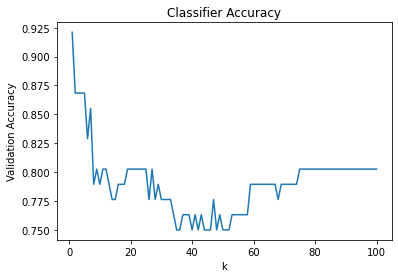

In [114]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
k_list = range(1,101)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(train_features, Y_train_smote)
  accuracies.append(classifier.score(test_features, Y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Classifier Accuracy")
plt.show()

In [115]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, weights = "distance")

In [116]:
classifier.fit(train_features, Y_train_smote)

Y_train_pred = classifier.predict(train_features)
Y_test_pred = classifier.predict(test_features)

print(classificationSummary(Y_train_smote, Y_train_pred))
print(roc_auc_score(Y_train_smote, Y_train_pred))
print(classificationSummary(Y_test, Y_test_pred))
print(roc_auc_score(Y_test, Y_test_pred))

Confusion Matrix (Accuracy 0.9977)

       Prediction
Actual   0   1
     0 215   0
     1   1 214
None
0.9976744186046511
Confusion Matrix (Accuracy 0.8684)

       Prediction
Actual  0  1
     0  2  3
     1  7 64
None
0.6507042253521127


In [117]:
classifier.predict_proba(test_features)

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.1849893 , 0.8150107 ],
       [0.        , 1.        ],
       [0.18069169, 0.81930831],
       [0.        , 1.        ],
       [0.59636777, 0.40363223],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.55462703, 0.44537297],
       [0.17471601, 0.82528399],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.59514913, 0.40485087],
       [0.        , 1.        ],
       [0.38773728, 0.61226272],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.27355355, 0.72644645],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

In [118]:
classificationSummary(Y_test,binarizer.fit_transform(classifier.predict_proba(test_features)-0.4)[:,1])

Confusion Matrix (Accuracy 0.9079)

       Prediction
Actual  0  1
     0  1  4
     1  3 68


In [119]:
from sklearn.ensemble import VotingClassifier

voting_ensemble = VotingClassifier(estimators=[("SVM", clf), ("KNN", classifier)],
                                  voting = 'soft')

In [120]:
voting_ensemble.fit(train_features, Y_train_smote)
Y_pred = voting_ensemble.predict(test_features)

classificationSummary(Y_test, Y_pred)
print(roc_auc_score(Y_test,Y_pred))

Confusion Matrix (Accuracy 0.9211)

       Prediction
Actual  0  1
     0  1  4
     1  2 69
0.5859154929577465


In [144]:
Y_pred = voting_ensemble.predict(train_features)

classificationSummary(Y_train_smote, Y_pred)
print(roc_auc_score(Y_train_smote,Y_pred))

Confusion Matrix (Accuracy 0.9977)

       Prediction
Actual   0   1
     0 215   0
     1   1 214
0.9976744186046511


In [140]:
predict=(binarizer.fit_transform(classifier.predict_proba(test_features)-0.4)[:,1]+binarizer.fit_transform(clf.predict_proba(test_features)-0.7)[:,1])/2
predict

array([0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 0. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ])

In [141]:
predict[20]=0.
predict[48]=0.
predict

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [142]:
classificationSummary(Y_test, predict)
print(roc_auc_score(Y_test,predict))

Confusion Matrix (Accuracy 0.9079)

       Prediction
Actual  0  1
     0  1  4
     1  3 68
0.5788732394366196
